In [11]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

passengers = pd.read_csv("../contents/AirPassengers.csv")
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [12]:
passengers = passengers.rename(columns={"Month":"ds", "#Passengers":"y"})

passengers["ds"] = pd.to_datetime(passengers["ds"])
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(passengers, test_size=0.2, shuffle=False)
model = Prophet()

model.fit(train)
prediction = model.predict(test)

15:26:18 - cmdstanpy - INFO - Chain [1] start processing
15:26:18 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_score(test["y"], prediction["yhat"])

0.7201447184427039

In [15]:
mean_absolute_error(test["y"], prediction["yhat"])

33.89629724041915

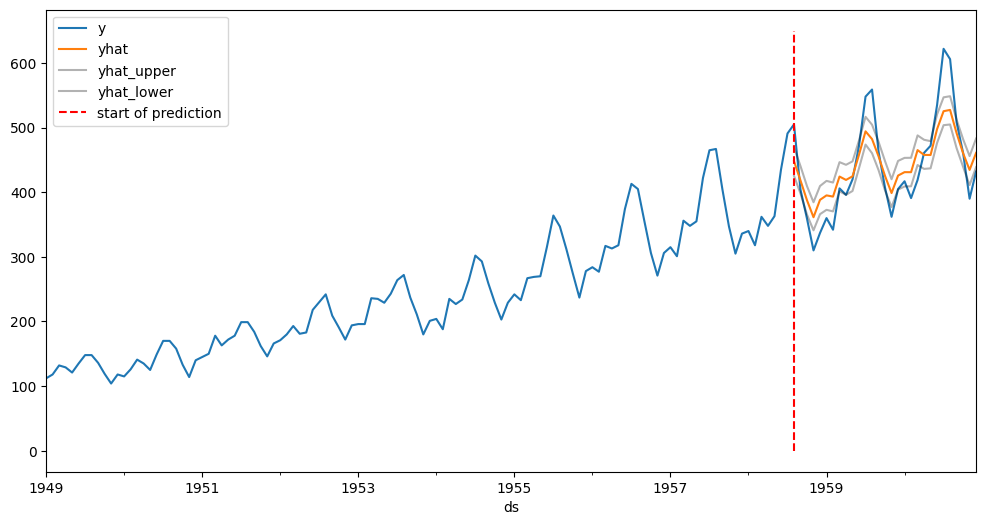

In [17]:
# prophet parameter 중 interval_width 를 높이면 이상치 탐지에 활용 가능하다.

fig, ax=plt.subplots(figsize=(12,6))
passengers.set_index("ds")["y"].plot(ax=ax)
prediction.set_index("ds")["yhat"].plot(ax=ax)
prediction.set_index("ds")["yhat_upper"].plot(ax=ax, color="k", alpha=0.3)
prediction.set_index("ds")["yhat_lower"].plot(ax=ax, color="k", alpha=0.3)
ax.vlines(test["ds"].iloc[0], 0, 650 ,linestyle="--", color="r", label="start of prediction")
ax.legend()
plt.show()

C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future

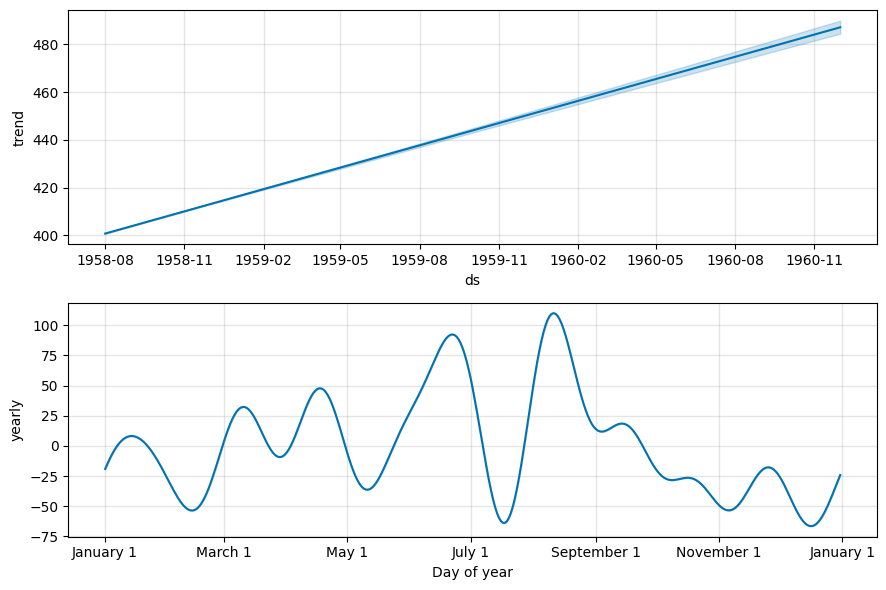

In [19]:
model.plot_components(model.predict(test))
plt.show()

C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future

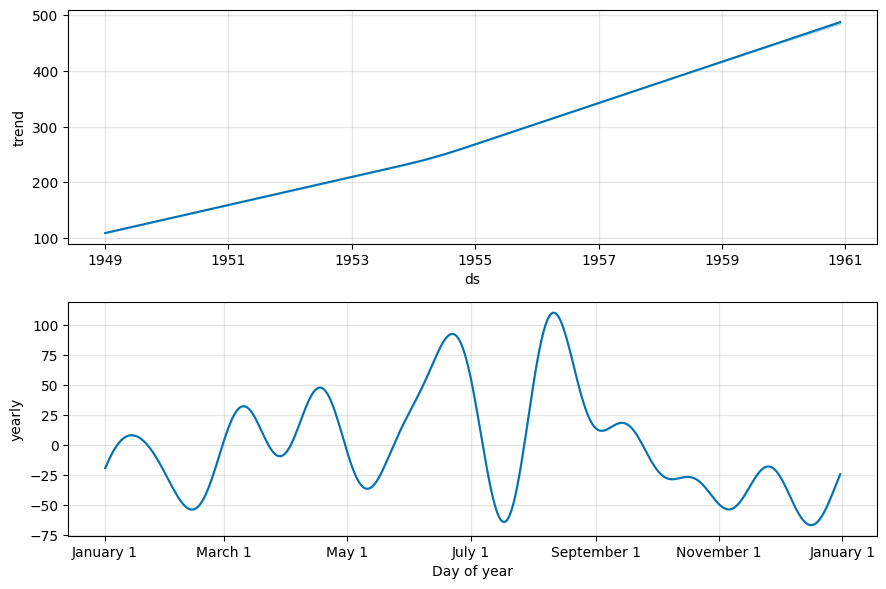

In [20]:
model.plot_components(model.predict(passengers))
plt.show()